In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import glob
from functools import partial
import seaborn as sns

plt.style.use('ggplot')

### Import cleaned CSVs to `pd.df`
- adv_df = advanced stats per season from 1985-2019
- szn_df = season average stats from 1985-2019
- lbj_df = LeBron James regular season stats by game from 2003-2019
- mj_df = Michael Jordan regular season stats by game from 1985 - 2002 (minus retirement years)
    - (retirement years: '94, '99-'01)
- lbjp_df = LeBron James post season stats per game
- mjp_df = Michael Jordan post season stats per game

In [241]:
adv_df = pd.read_csv("data/final_adv_data_cleaned.csv")
szn_df = pd.read_csv("data/final_szn_data_cleaned.csv")
# lbj_df = pd.read_csv("data/final_lbj_comb_szn_stats.csv")
# mj_df = pd.read_csv("data/final_mj_comb_szn_stats.csv")
# lbjp_df = pd.read_csv("data/final_lbj_ps_cleaned.csv")
# mjp_df = pd.read_csv("data/final_mj_ps_cleaned.csv")

In [245]:
#For some reason, mj_df has 3 duplicates of each row... REMOVE!

# mj_df.drop_duplicates(subset="Date", keep='first', inplace=True)
# mj_df.to_csv("final_mj_comb_szn_stats.csv")


 ### Review/apply:
 
     - t-test, CLT******
     - Welsh adjustment
     - power analysis (maybe)
     - for presentation: justify the why's behind the assumptions (iid)
 
 - Bonferoni -> alpha value for multiple hypotheses, but this shouldn't apply to me since the two hypotheses are separate from each other

### Null Hypothesis 1: 
- If "Game Score (GmSc)" were the measure of greatness, the player with a higher GmSc rating is the better player. LeBron James and Michael Jordan are NOT better than one another.


    - Count winning pairs and perform a Mann-Whitney test
    - Two-tailed test

### Alternate Hypothesis 1:
- LeBron James is a better player than Michael Jordan, or vice versa.

### Null Hypothesis 2:
- LeBron James has played in a more talented league than did Michael Jordan.
    - Average GmSc from diff eras, same t-test and Welsh adjustment
    

### Alternate Hypothesis 2:
- LeBron James has NOT played in a more talented league thann did Michael Jordan.

## Visualization and Summary of LBJ's and MJ's Regular Season "GmSc" throughout their career 

###### GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.).

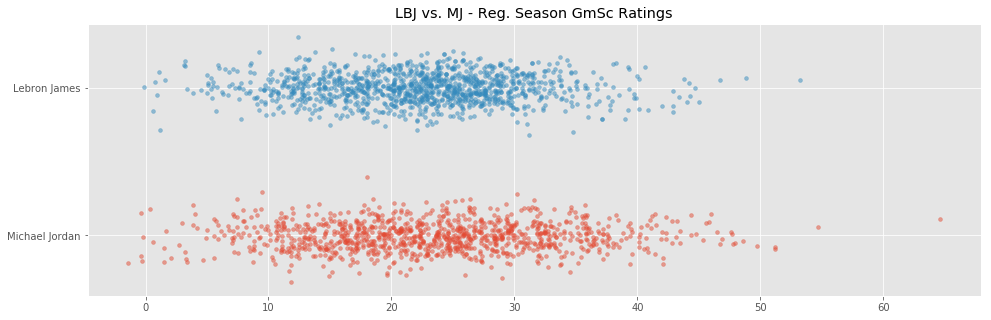

LBJ GmSc:  count    1198.000000
mean       22.253506
std         7.782342
min        -0.100000
25%        17.000000
50%        22.600000
75%        27.200000
max        53.200000
Name: GmSc, dtype: float64
MJ GmSc:  count    1072.000000
mean       23.440951
std         9.487120
min        -1.400000
25%        16.800000
50%        23.450000
75%        29.600000
max        64.600000
Name: GmSc, dtype: float64


In [361]:
fig, ax = plt.subplots(1, figsize=(16, 5))
lbj_gmsc = lbj_df["GmSc"]
mj_gmsc = mj_df["GmSc"]

ax.scatter(mj_gmsc, np.repeat(0, len(mj_gmsc)) + np.random.normal(0, 0.1, len(mj_gmsc)),alpha=0.5, s=15)
ax.scatter(lbj_gmsc, np.repeat(1, len(lbj_gmsc)) + np.random.normal(0, 0.1, len(lbj_gmsc)), alpha=0.5, s=15)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Michael Jordan", "Lebron James"])
ax.set_title("LBJ vs. MJ - Reg. Season GmSc Ratings")
plt.show()
print("LBJ GmSc: ", lbj_df["GmSc"].describe())
print("MJ GmSc: ", mj_df["GmSc"].describe())

### Distribution of LBJ's and MJ's GmSc rating over time - Career Overview

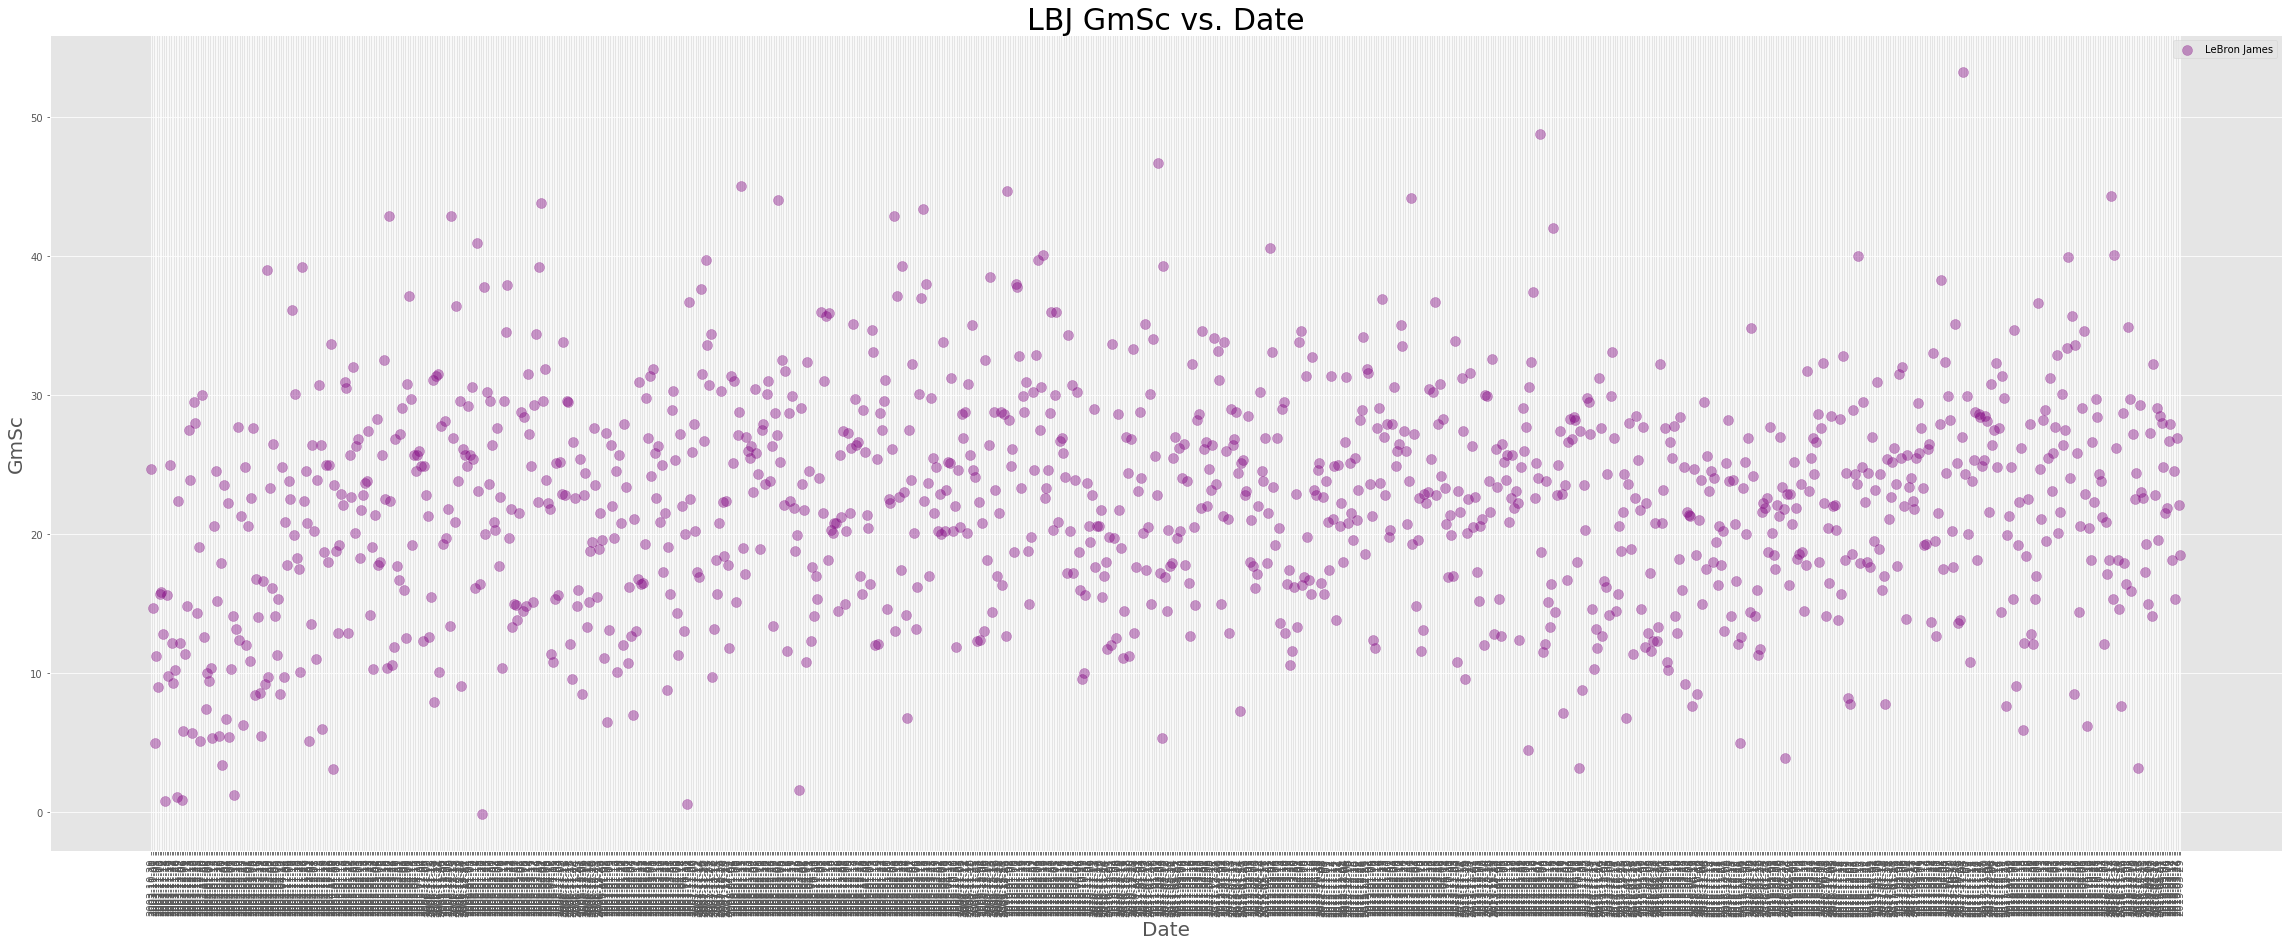

count    1198.000000
mean       22.253506
std         7.782342
min        -0.100000
25%        17.000000
50%        22.600000
75%        27.200000
max        53.200000
Name: GmSc, dtype: float64


In [321]:
fig, ax = plt.subplots(figsize=(40,15))
ax.scatter(lbj_df["Date"], lbj_df["GmSc"], s=100, alpha=0.4, color='purple', label="LeBron James")
ax.set_xlabel("Date", size=20)
ax.set_ylabel("GmSc", size=20)
ax.set_title("LBJ GmSc vs. Date", size=30)
ax.legend()
plt.xticks(rotation='vertical')
plt.show()

print(lbj_df["GmSc"].describe())

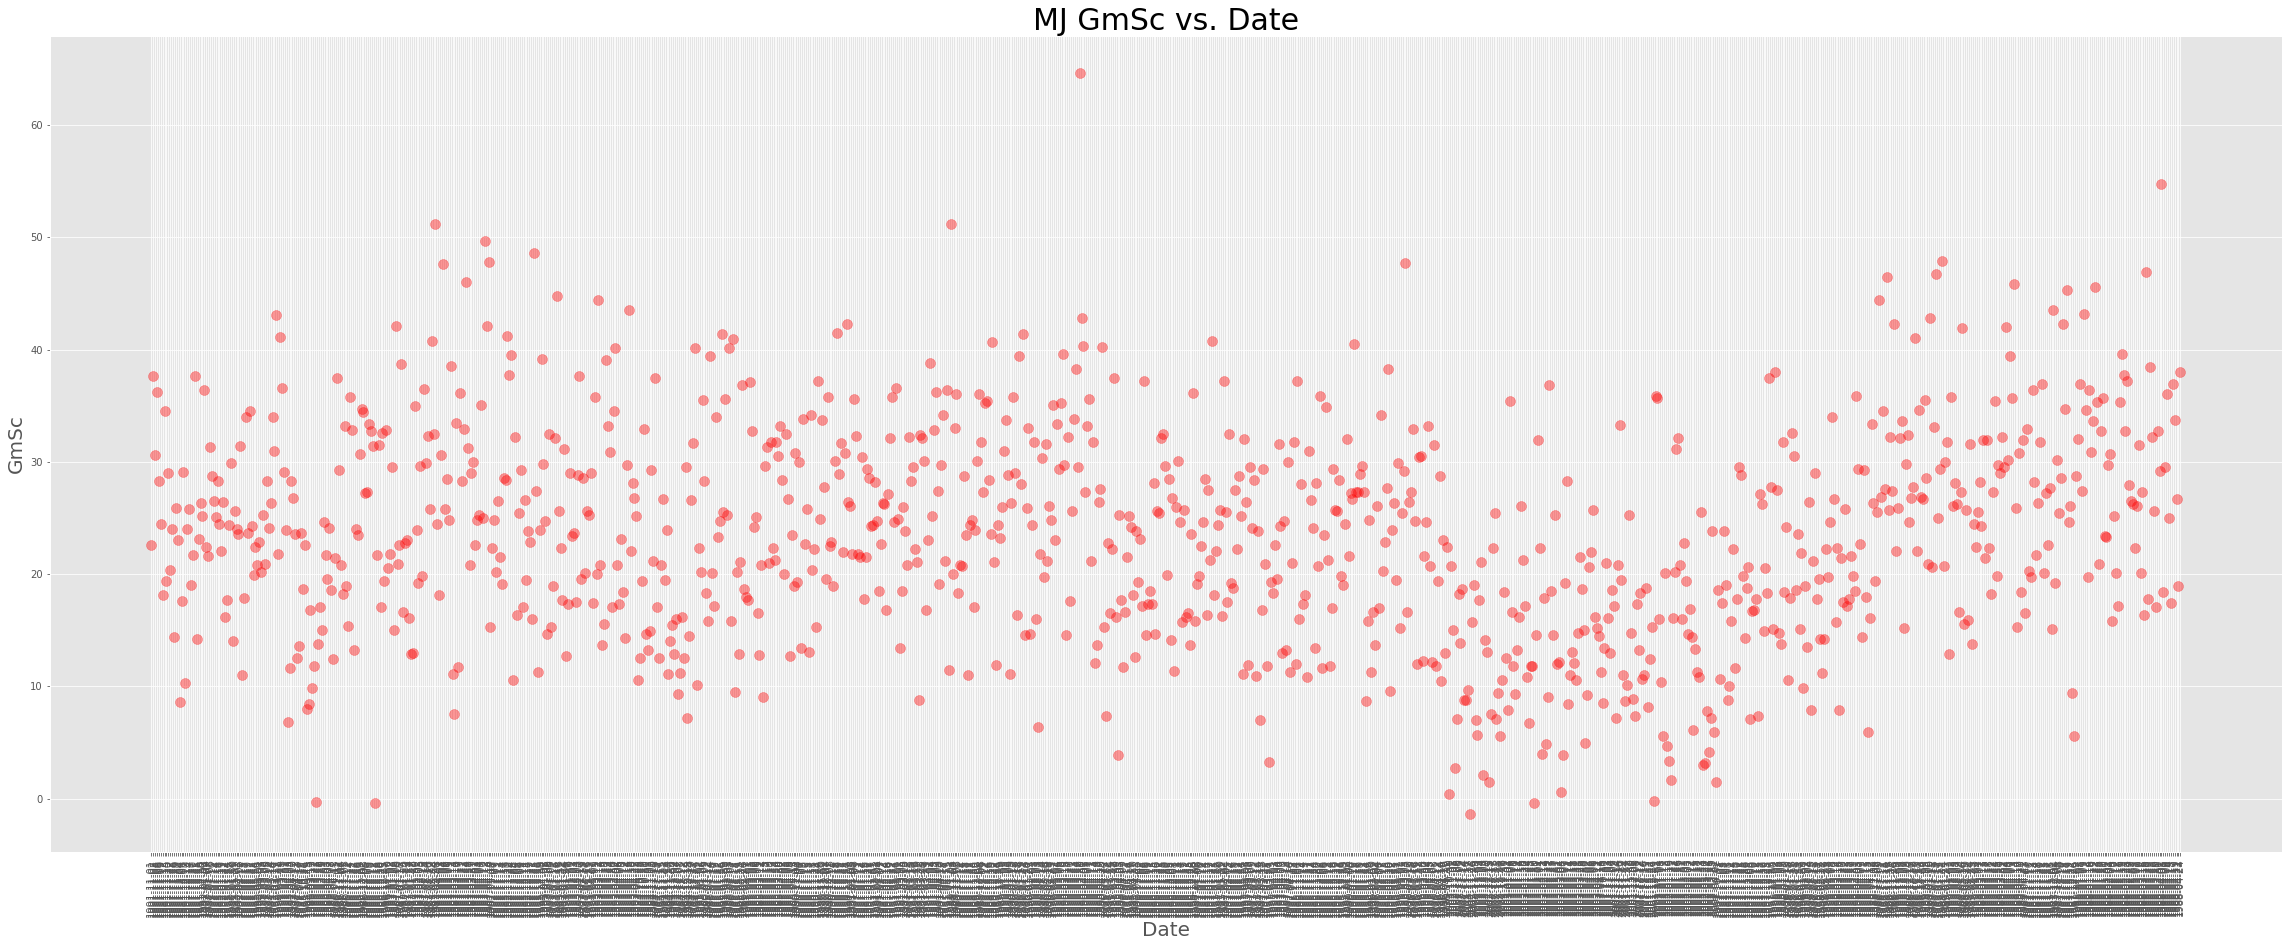

count    1072.000000
mean       23.440951
std         9.487120
min        -1.400000
25%        16.800000
50%        23.450000
75%        29.600000
max        64.600000
Name: GmSc, dtype: float64


In [322]:
fig, ax = plt.subplots(figsize=(40,15))
ax.scatter(mj_df["Date"], mj_df["GmSc"], s=100, alpha=0.4, color='red')
ax.set_xlabel("Date", size=20)
ax.set_ylabel("GmSc", size=20)
ax.set_title("MJ GmSc vs. Date", size=30)
plt.xticks(rotation='vertical')
plt.show()

print(mj_df["GmSc"].describe())

### What about in the playoffs? ("GmSc")

LBJ Postseason GmSc:  count    239.000000
mean      23.496653
std        8.330196
min       -0.700000
25%       18.550000
50%       23.300000
75%       28.800000
max       44.700000
Name: GmSc, dtype: float64

MJ Postseason GmSc:  count    179.000000
mean      25.141341
std        8.180991
min        2.600000
25%       19.800000
50%       24.600000
75%       30.700000
max       49.800000
Name: GmSc, dtype: float64


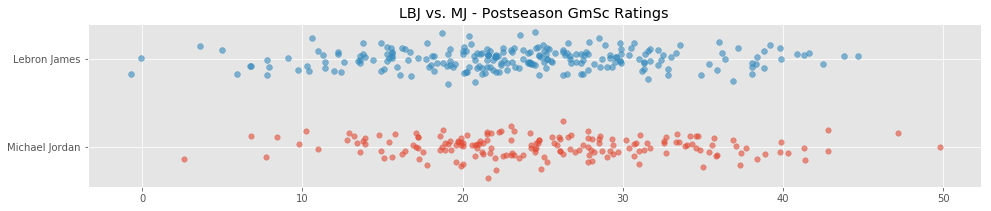

In [355]:
fig, ax = plt.subplots(1, figsize=(16, 3))

mjp_gmsc = mjp_df["GmSc"]
lbjp_gmsc = lbjp_df["GmSc"]

ax.scatter(mjp_gmsc, np.repeat(0, len(mjp_gmsc)) + np.random.normal(0, 0.1, len(mjp_gmsc)),alpha=0.6, s=30)
ax.scatter(lbjp_gmsc, np.repeat(1, len(lbjp_gmsc)) + np.random.normal(0, 0.1, len(lbjp_gmsc)), alpha=0.6, s=35)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Michael Jordan", "Lebron James"])
ax.set_title("LBJ vs. MJ - Postseason GmSc Ratings")

print("LBJ Postseason GmSc: ", lbjp_df["GmSc"].describe())
print()
print("MJ Postseason GmSc: ", mjp_df["GmSc"].describe())

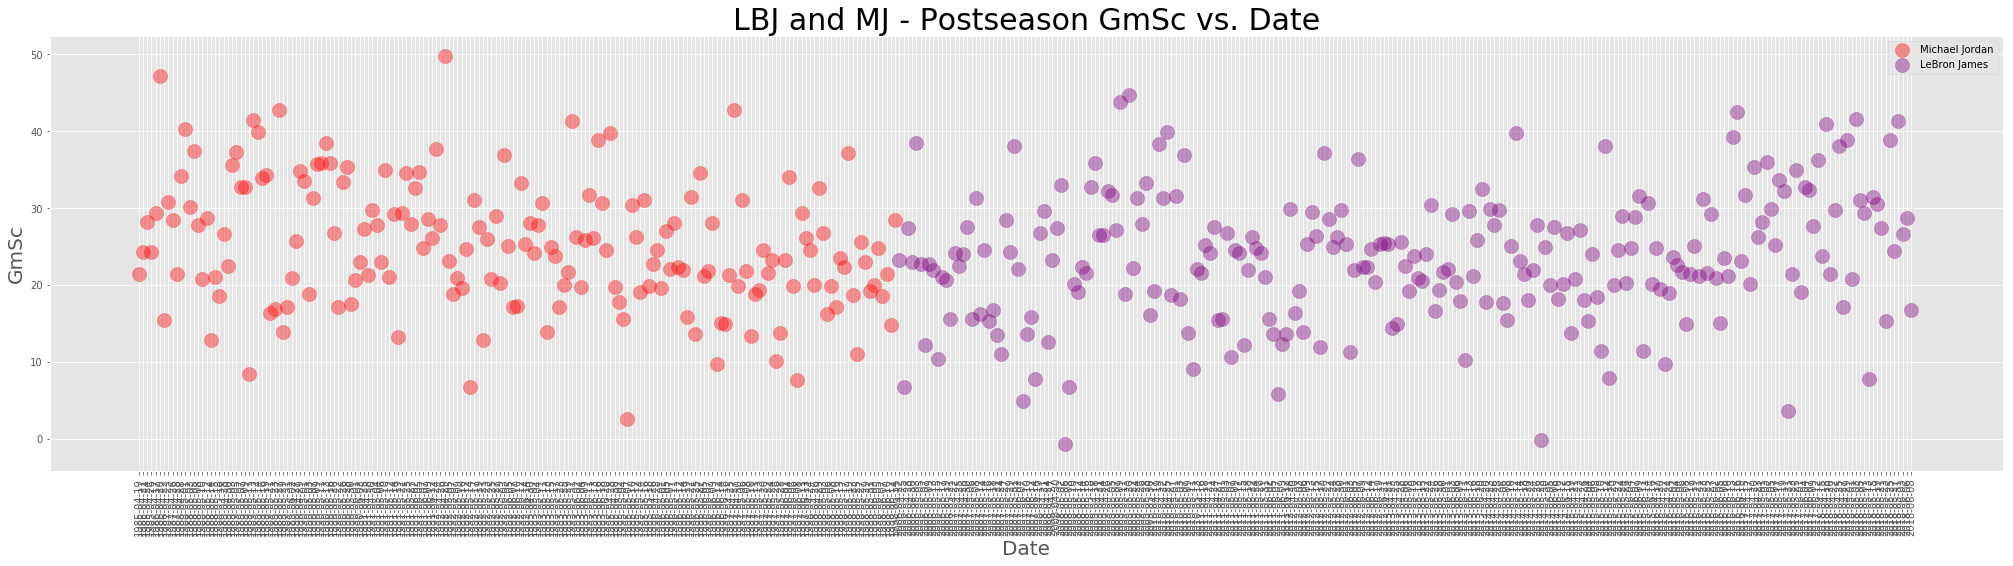

LBJ Postseason GmSc:  count    239.000000
mean      23.496653
std        8.330196
min       -0.700000
25%       18.550000
50%       23.300000
75%       28.800000
max       44.700000
Name: GmSc, dtype: float64

MJ Postseason GmSc:  count    179.000000
mean      25.141341
std        8.180991
min        2.600000
25%       19.800000
50%       24.600000
75%       30.700000
max       49.800000
Name: GmSc, dtype: float64


In [329]:
#Side by Side Graph

fig, ax = plt.subplots(figsize=(35,8))
ax.scatter(mjp_df["Date"], mjp_df["GmSc"], s=200, alpha=0.4, color='red', label="Michael Jordan")
ax.scatter(lbjp_df["Date"], lbjp_df["GmSc"], s=200, alpha=0.4, color='purple', label="LeBron James")
ax.set_xlabel("Date", size=20)
ax.set_ylabel("GmSc", size=20)
ax.set_title("LBJ and MJ - Postseason GmSc vs. Date", size=30)
ax.legend()
plt.xticks(rotation='vertical')
plt.show()

print("LBJ Postseason GmSc: ", lbjp_df["GmSc"].describe())
print()
print("MJ Postseason GmSc: ", mjp_df["GmSc"].describe())

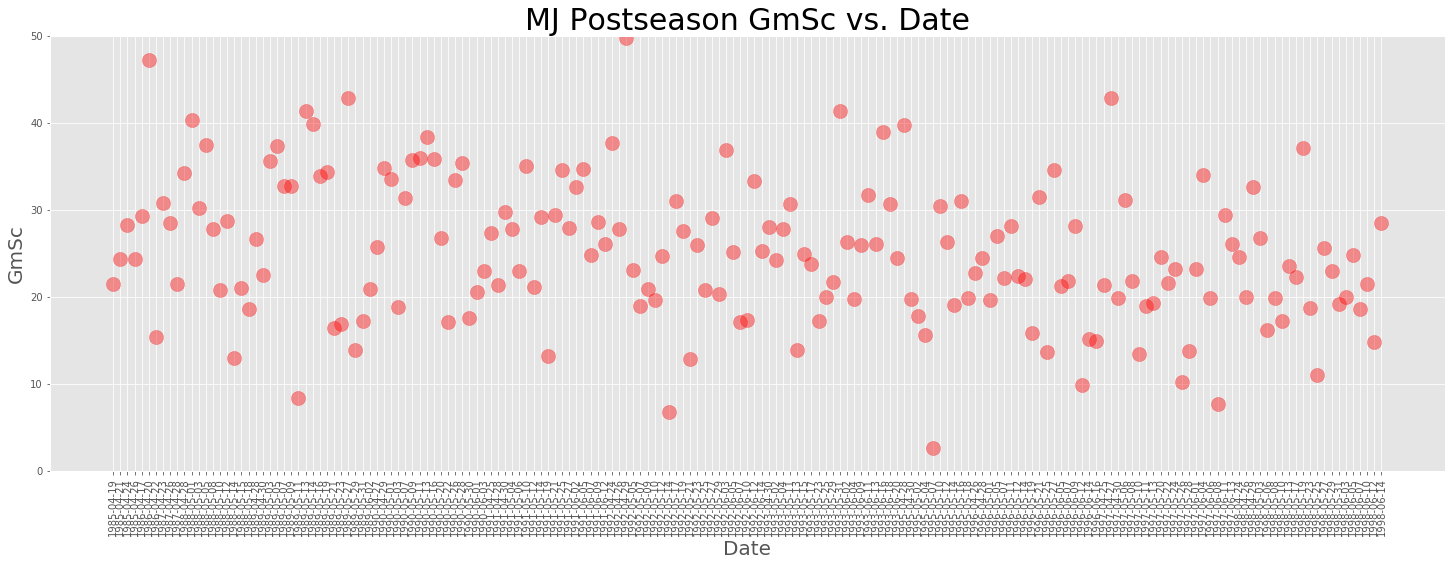

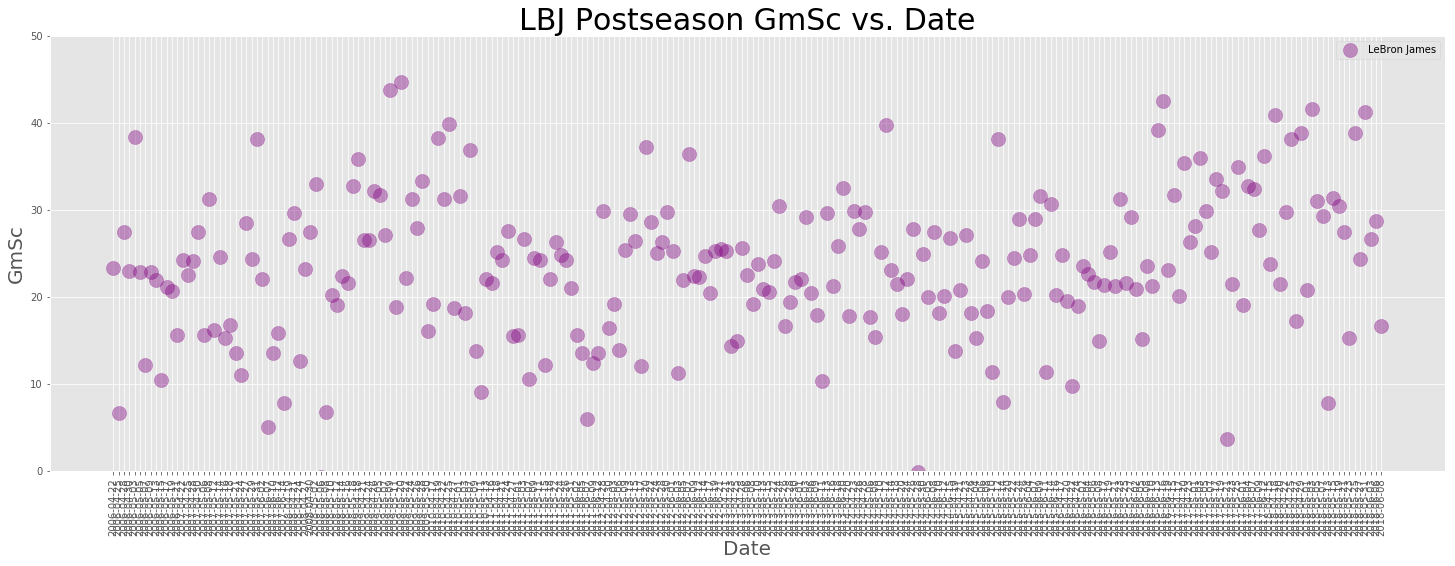

In [332]:
fig, ax = plt.subplots(figsize=(25,8))
ax.scatter(mjp_df["Date"], mjp_df["GmSc"], s=200, alpha=0.4, color='red')
ax.set_xlabel("Date", size=20)
ax.set_ylabel("GmSc", size=20)
ax.set_title("MJ Postseason GmSc vs. Date", size=30)
ax.set_ylim(0, 50, 0.5)
plt.xticks(rotation='vertical')
plt.show()

fig, ax = plt.subplots(figsize=(25,8))
ax.scatter(lbjp_df["Date"], lbjp_df["GmSc"], s=200, alpha=0.4, color='purple', label="LeBron James")
ax.set_xlabel("Date", size=20)
ax.set_ylabel("GmSc", size=20)
ax.set_title("LBJ Postseason GmSc vs. Date", size=30)
ax.set_ylim(0, 50, 0.5)
ax.legend()
plt.xticks(rotation='vertical')
plt.show()

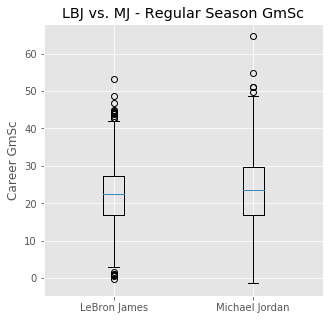

LBJ avg PER count    1198.000000
mean       22.253506
std         7.782342
min        -0.100000
25%        17.000000
50%        22.600000
75%        27.200000
max        53.200000
Name: GmSc, dtype: float64

MJ avg PER count    1072.000000
mean       23.440951
std         9.487120
min        -1.400000
25%        16.800000
50%        23.450000
75%        29.600000
max        64.600000
Name: GmSc, dtype: float64


In [365]:
data = [lbj_df["GmSc"], mj_df["GmSc"]]

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(data, labels=["LeBron James", "Michael Jordan"])
ax.set_ylabel("Career GmSc")
ax.set_title("LBJ vs. MJ - Regular Season GmSc")
plt.show()


print("LBJ avg PER", lbj_df["GmSc"].describe())
print()
print("MJ avg PER", mj_df["GmSc"].describe())

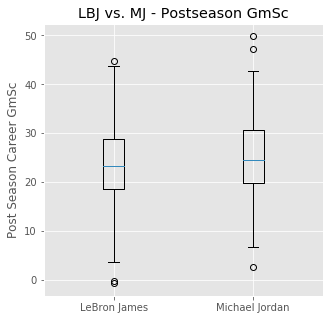

LBJ PS GmSc count    1198.000000
mean       22.253506
std         7.782342
min        -0.100000
25%        17.000000
50%        22.600000
75%        27.200000
max        53.200000
Name: GmSc, dtype: float64

MJ PS GmSc count    1072.000000
mean       23.440951
std         9.487120
min        -1.400000
25%        16.800000
50%        23.450000
75%        29.600000
max        64.600000
Name: GmSc, dtype: float64


In [364]:
data = [lbjp_df["GmSc"], mjp_df["GmSc"]]

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(data, labels=["LeBron James", "Michael Jordan"])
ax.set_ylabel("Post Season Career GmSc")
ax.set_title("LBJ vs. MJ - Postseason GmSc")
plt.show()


print("LBJ PS GmSc", lbj_df["GmSc"].describe())
print()
print("MJ PS GmSc", mj_df["GmSc"].describe())

## Using Advanced Stats

In [247]:
#lbj and mj advanced stats from adv_df

lbj_adv = adv_df[adv_df["Player"].str.contains("LeBron James")]
mj_adv = adv_df[adv_df["Player"].str.contains("Michael Jordan")]
# SF_adv = adv_df[adv_df["Pos"].str.contains("SF")]
# SG_adv = adv_df[adv_df["Pos"].str.contains("SG")]

#### Lebron James and Michael Jordan have a very similar career PER, though Jordan's is higher by 0.15. 

- Lebron's PER shows a standard deviation that is about 0.66 less, which shows Lebron has been more consistent. 
- Lebron's PER std may increase if his production drops as he nears retirement.

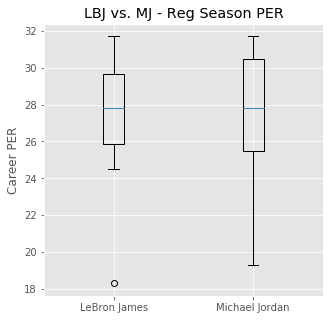

LBJ avg PER count    16.000000
mean     27.625000
std       3.347736
min      18.300000
25%      25.850000
50%      27.800000
75%      29.650000
max      31.700000
Name: PER, dtype: float64

MJ avg PER count    15.000000
mean     27.373333
std       4.013809
min      19.300000
25%      25.500000
50%      27.800000
75%      30.450000
max      31.700000
Name: PER, dtype: float64


In [366]:
data = [lbj_adv["PER"], mj_adv["PER"]]

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(data, labels=["LeBron James", "Michael Jordan"])
ax.set_ylabel("Career PER")
ax.set_title("LBJ vs. MJ - Reg Season PER")
plt.show()

print("LBJ avg PER", lbj_adv["PER"].describe())
print()
print("MJ avg PER", mj_adv["PER"].describe())

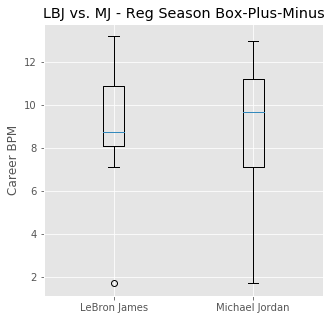

LBJ avg BPM count    16.000000
mean      8.956250
std       2.604347
min       1.700000
25%       8.075000
50%       8.750000
75%      10.900000
max      13.200000
Name: BPM, dtype: float64

MJ avg BPM count    15.000000
mean      8.806667
std       3.458420
min       1.700000
25%       7.100000
50%       9.700000
75%      11.200000
max      13.000000
Name: BPM, dtype: float64


In [367]:
data = [lbj_adv["BPM"], mj_adv["BPM"]]

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(data, labels=["LeBron James", "Michael Jordan"])
ax.set_ylabel("Career BPM")
ax.set_title("LBJ vs. MJ - Reg Season Box-Plus-Minus")
plt.show()

print("LBJ avg BPM", lbj_adv["BPM"].describe())
print()
print("MJ avg BPM", mj_adv["BPM"].describe())

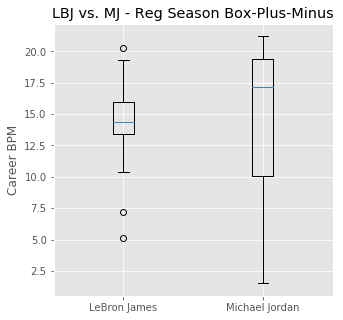

LBJ avg WS count    16.000000
mean     14.175000
std       4.005413
min       5.100000
25%      13.425000
50%      14.400000
75%      16.000000
max      20.300000
Name: WS, dtype: float64

MJ avg WS count    15.000000
mean     14.260000
std       7.134704
min       1.500000
25%      10.100000
50%      17.200000
75%      19.400000
max      21.200000
Name: WS, dtype: float64


In [368]:
data = [lbj_adv["WS"], mj_adv["WS"]]

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(data, labels=["LeBron James", "Michael Jordan"])
ax.set_ylabel("Career BPM")
ax.set_title("LBJ vs. MJ - Reg Season Box-Plus-Minus")
plt.show()

print("LBJ avg WS", lbj_adv["WS"].describe())
print()
print("MJ avg WS", mj_adv["WS"].describe())

In [436]:
lbj_adv.describe()

,Unnamed: 0,Rk,Age,G,PER,TS%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP,Year
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,7170.187500,222.000000,26.500000,74.875000,27.625000,0.587875,11.212500,36.018750,2.181250,1.575000,13.156250,31.556250,9.96875,4.20000,14.175000,0.23550,8.956250,7.975000,2011.500000
std,3178.834885,15.440207,4.760952,7.209947,3.347736,0.038676,1.519155,4.576202,0.310309,0.417133,1.715408,1.573518,3.19890,1.16619,4.005413,0.06049,2.604347,2.203785,4.760952
min,1765.000000,203.000000,19.000000,55.000000,18.300000,0.488000,7.600000,27.800000,1.600000,0.800000,10.700000,28.200000,2.40000,2.60000,5.100000,0.07800,1.700000,2.900000,2004.000000
25%,5133.000000,210.250000,22.750000,74.750000,25.850000,0.568000,10.100000,32.875000,2.000000,1.300000,11.725000,30.800000,9.20000,3.00000,13.425000,0.20525,8.075000,7.300000,2007.750000
50%,7298.500000,220.500000,26.500000,76.500000,27.800000,0.589500,11.450000,36.200000,2.200000,1.500000,13.250000,31.550000,10.15000,4.40000,14.400000,0.23700,8.750000,8.000000,2011.500000
75%,9598.500000,227.750000,30.250000,79.000000,29.650000,0.608500,12.450000,38.800000,2.400000,1.925000,14.025000,32.600000,12.07500,4.82500,16.000000,0.27250,10.900000,9.500000,2015.250000
max,12045.000000,258.000000,34.000000,82.000000,31.700000,0.649000,13.100000,44.400000,2.800000,2.400000,16.100000,33.800000,14.60000,6.50000,20.300000,0.32200,13.200000,11.800000,2019.000000


In [437]:
mj_adv.describe()

,Unnamed: 0,Rk,Age,G,PER,TS%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP,Year
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,10423.400000,175.400000,28.800000,71.466667,27.373333,0.559467,9.380000,24.806667,3.100000,1.466667,9.293333,33.600000,9.993333,4.280000,14.260000,0.236600,8.806667,7.740000,1992.800000
std,6338.554666,24.064793,5.595917,22.617524,4.013809,0.046300,1.114963,4.286601,0.650275,0.567786,1.628525,2.666458,5.486277,1.777719,7.134704,0.078007,3.458420,3.880685,5.595917
min,250.000000,141.000000,21.000000,17.000000,19.300000,0.468000,7.400000,18.000000,2.200000,0.900000,7.000000,28.700000,1.000000,0.500000,1.500000,0.075000,1.700000,1.100000,1985.000000
25%,3886.500000,154.500000,24.500000,79.000000,25.500000,0.533000,8.650000,21.450000,2.400000,1.050000,8.400000,32.500000,6.600000,3.550000,10.100000,0.190000,7.100000,4.950000,1988.500000
50%,13488.000000,177.000000,28.000000,82.000000,27.800000,0.567000,9.500000,25.200000,3.100000,1.300000,9.100000,33.300000,12.000000,5.000000,17.200000,0.270000,9.700000,9.200000,1992.000000
75%,15037.500000,191.000000,32.500000,82.000000,30.450000,0.597500,10.000000,26.350000,3.650000,1.600000,9.850000,34.400000,14.400000,5.400000,19.400000,0.288500,11.200000,10.600000,1996.500000
max,16848.000000,215.000000,39.000000,82.000000,31.700000,0.614000,11.600000,34.700000,3.900000,2.700000,13.000000,38.600000,15.200000,6.200000,21.200000,0.321000,13.000000,12.500000,2003.000000


## Using Advanced Stats data

In [10]:
adv_df.head(5)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,PER,TS%,TRB%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP,Year
0,0,1,Mahmoud Abdul-Rauf,PG,28.0,SAC,31.0,10.5,0.405,3.9,...,0.1,6.4,25.1,-0.5,0.2,-0.3,-0.025,-4.6,-0.4,1998
1,1,2,Tariq Abdul-Wahad,SG,23.0,SAC,59.0,10.1,0.456,6.7,...,0.9,13.6,22.1,-0.8,0.6,-0.2,-0.008,-4.8,-0.7,1998
2,2,3,Shareef Abdur-Rahim,SF,21.0,VAN,82.0,21.1,0.562,11.3,...,1.8,13.6,28.4,6.3,0.6,6.9,0.113,1.6,2.6,1998
3,3,4,Cory Alexander,PG,24.0,TOT,60.0,15.2,0.548,6.6,...,0.6,20.1,19.8,1.0,1.2,2.2,0.081,0.4,0.8,1998
4,4,4,Cory Alexander,PG,24.0,SAS,37.0,11.1,0.512,5.4,...,0.7,22.6,19.5,-0.2,0.8,0.7,0.065,-1.3,0.1,1998


### Delete Rows for Players who played less than 20 games in a season

In [454]:
adv_df = adv_df[adv_df["G"] > 20]
szn_df = szn_df[szn_df["G"] > 20]

szn_df_lbj = szn_df[szn_df["Year"] > 2003]
szn_df_mj = szn_df[szn_df["Year"] < 2004]
adv_df_lbjyrs = adv_df[adv_df["Year"] > 2003]
adv_df_mjyrs = adv_df[adv_df["Year"] < 2004]

In [451]:
adv_top= adv_df.sort_values(by="PER", ascending=False).head(250)
adv_2500= adv_df.sort_values(by="PER", ascending=False).head(2500)

In [419]:
lbjonly_szn_df = szn_df_lbj[szn_df_lbj["Player"].str.contains("LeBron James")]
mjonly_szn_df = szn_df_mj[szn_df_mj["Player"].str.contains("Michael Jordan")]

In [421]:
szn_250= szn_df.sort_values(by="GmSc", ascending=False).head(300)
szn_2500= szn_df.sort_values(by="GmSc", ascending=False).head(2500)

In [416]:
szn_df_lbj_250 = szn_df_lbj.sort_values(by="GmSc", ascending=False).head(300)
szn_df_mj_250 = szn_df_mj.sort_values(by="GmSc", ascending=False).head(300)
szn_df_lbj_100 = szn_df_lbj.sort_values(by="GmSc", ascending=False).head(100)
szn_df_mj_100 = szn_df_mj.sort_values(by="GmSc", ascending=False).head(100)
szn_df_lbj_50 = szn_df_lbj.sort_values(by="GmSc", ascending=False).head(50)
szn_df_mj_50 = szn_df_mj.sort_values(by="GmSc", ascending=False).head(50)

<Figure size 432x288 with 0 Axes>

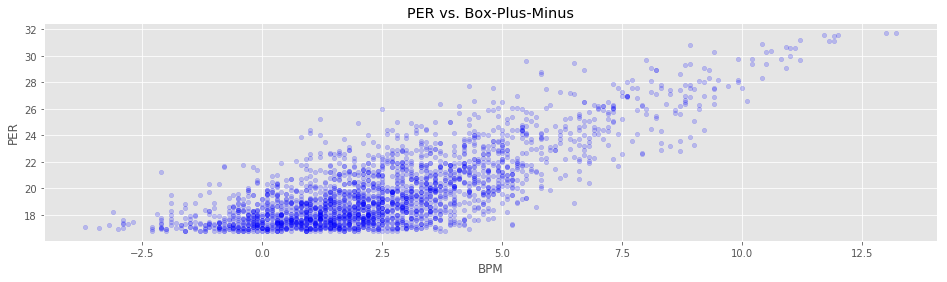

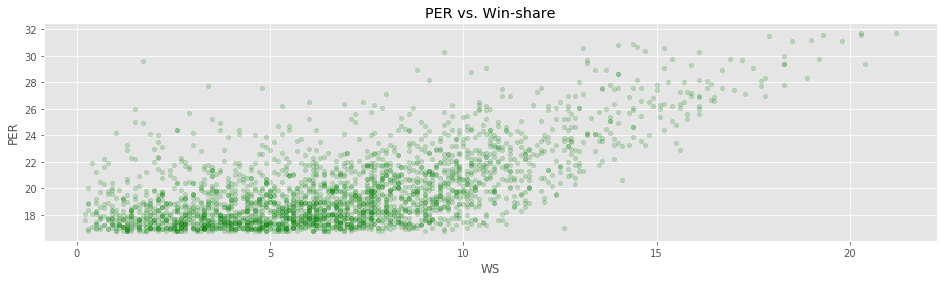

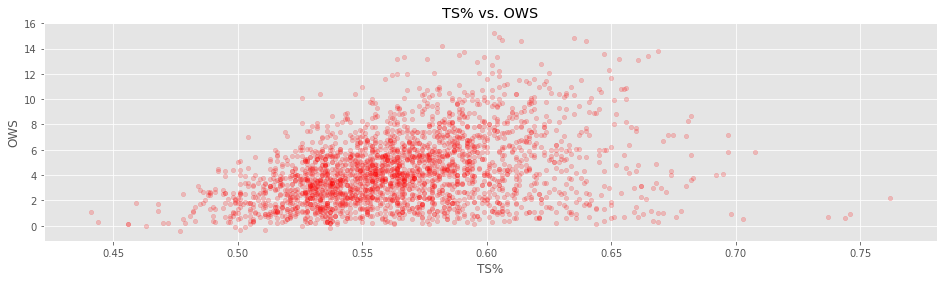

In [430]:
#EDA to see relationships
plt.figure()
adv_2500.plot(x="BPM", y="PER", kind='scatter', figsize=(16,4), alpha=0.2, 
             color="blue", title="PER vs. Box-Plus-Minus")
adv_2500.plot(x="WS", y="PER", kind='scatter', figsize=(16,4),
             alpha=0.2, color="green", title="PER vs. Win-share")
adv_2500.plot(x="TS%", y="OWS", kind='scatter', figsize=(16,4),
             alpha=0.2, color="red", title="TS% vs. OWS")

In [168]:
# adv_500.groupby(["Year","Player"])['PER'].median().unstack().plot(kind='line', figsize=(20, 10))

In [387]:
szn_df.sort_values(by="GmSc", ascending=False)

,Unnamed: 0,Rk,Player,Pos,Age,G,FG,FGA,FG%,3P,...,2P%,eFG%,TRB,AST,STL,BLK,TOV,PTS,Year,GmSc
626,650,146,Michael Jordan*,SG,24.0,82.0,13.0,24.4,0.535,0.1,...,0.546,0.537,5.5,5.9,3.2,1.6,3.1,35.0,1988,28.80
189,197,163,Michael Jordan*,SG,25.0,81.0,11.9,22.2,0.538,0.3,...,0.553,0.546,8.0,8.0,2.9,0.8,3.6,32.5,1989,28.50
16192,16833,169,Michael Jordan*,SG,26.0,82.0,12.6,24.0,0.526,1.1,...,0.548,0.550,6.9,6.3,2.8,0.7,3.0,33.6,1990,27.58
14529,15100,141,Michael Jordan*,SG,23.0,82.0,13.4,27.8,0.482,0.1,...,0.491,0.484,5.2,4.6,2.9,1.5,3.3,37.1,1987,27.39
10336,10742,206,James Harden,PG,29.0,78.0,10.8,24.5,0.442,4.8,...,0.528,0.541,6.6,7.5,2.0,0.7,5.0,36.1,2019,26.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,13422,389,LaSalle Thompson,C,35.0,26.0,0.1,0.7,0.158,0.0,...,0.158,0.158,1.3,0.1,0.1,0.2,0.3,0.4,1997,-0.05
3485,3616,220,Darnell Jackson,PF,24.0,28.0,0.3,1.1,0.300,0.0,...,0.308,0.317,0.8,0.1,0.1,0.1,0.5,0.8,2010,-0.11
14558,15130,170,Fernando Martín,C,24.0,24.0,0.4,1.3,0.290,0.0,...,0.300,0.290,1.2,0.4,0.3,0.0,0.8,0.9,1987,-0.14
15401,16009,190,Jay Murphy,PF,22.0,23.0,0.3,2.2,0.160,0.0,...,0.163,0.160,1.8,0.2,0.0,0.1,0.3,1.2,1985,-0.17


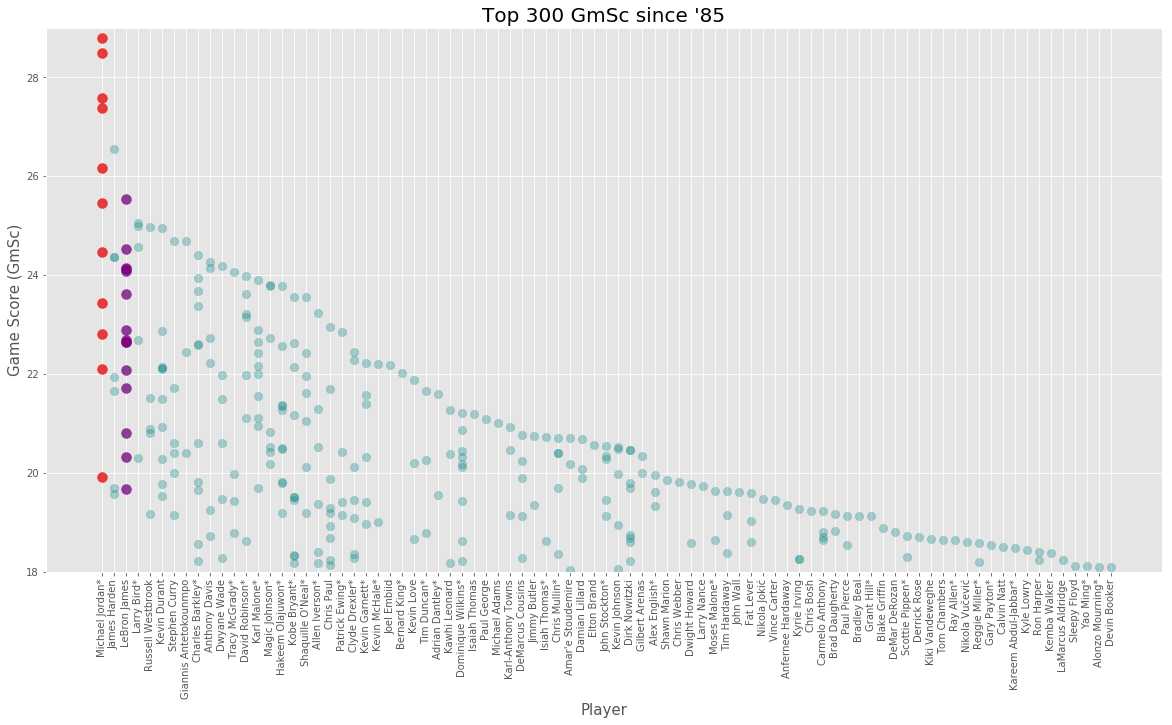

Top 300 GmSc Ratings:  count    300.000000
mean      20.728267
std        2.100113
min       18.040000
25%       19.137500
50%       20.305000
75%       22.082500
max       28.800000
Name: GmSc, dtype: float64


In [434]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(szn_250["Player"], szn_250["GmSc"], s=70, alpha=0.3, color='teal')
ax.scatter(lbjonly_szn_df["Player"], lbjonly_szn_df["GmSc"], s=100, alpha=0.7, color='purple')
ax.scatter(mjonly_szn_df["Player"], mjonly_szn_df["GmSc"], s=100, alpha=0.7, color='red')

plt.xticks(rotation='vertical')
ax.set_title("Top 300 GmSc since '85", size=20)
ax.set_ylim(18,29)
ax.set_xlabel("Player", size=15)
ax.set_ylabel("Game Score (GmSc)", size=15)
plt.show()

print("Top 300 GmSc Ratings: ", szn_250["GmSc"].describe())

count    300.000000
mean      18.753533
std        2.294036
min       16.060000
25%       17.000000
50%       17.960000
75%       20.182500
max       26.550000
Name: GmSc, dtype: float64


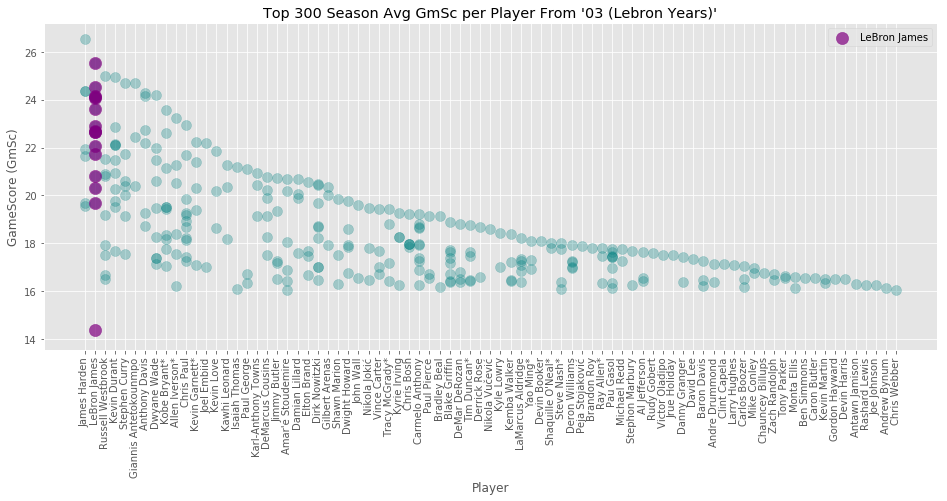

In [431]:
print(szn_df_lbj_250["GmSc"].describe())

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(szn_df_lbj_250["Player"], szn_df_lbj_250["GmSc"], s=100, alpha=0.3, color="teal", label=None)
ax.scatter(lbjonly_szn_df["Player"], lbjonly_szn_df["GmSc"], s=150, alpha=0.7, color="purple",
           label="LeBron James")
plt.xticks(rotation="vertical")
ax.set_title("Top 300 Season Avg GmSc per Player From '03 (Lebron Years)'")
ax.set_xlabel("Player")
ax.set_ylabel("GameScore (GmSc)")
ax.legend()
plt.show()

count    300.000000
mean      18.903400
std        2.592432
min       15.890000
25%       16.800000
50%       18.210000
75%       20.400000
max       28.800000
Name: GmSc, dtype: float64


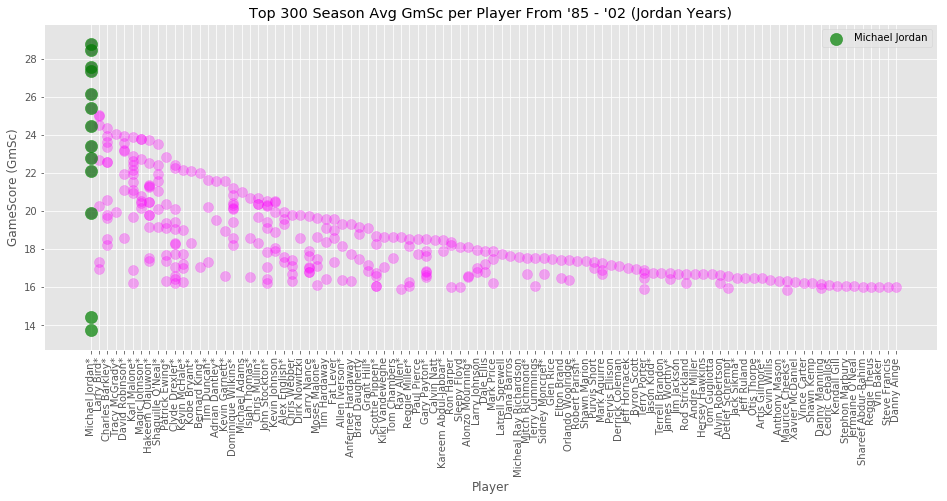

In [432]:
print(szn_df_mj_250["GmSc"].describe())

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(szn_df_mj_250["Player"], szn_df_mj_250["GmSc"], s=100, alpha=0.3, color="magenta", label=None)
ax.scatter(mjonly_szn_df["Player"], mjonly_szn_df["GmSc"], s=150, alpha=0.7, color="green",
          label="Michael Jordan")
plt.xticks(rotation="vertical")
ax.set_title("Top 300 Season Avg GmSc per Player From '85 - '02 (Jordan Years)")
ax.set_xlabel("Player")
ax.set_ylabel("GameScore (GmSc)")
ax.legend()
plt.show()

In [420]:
lbjonly_szn_df.sort_values(by="Year")
mjonly_szn_df.sort_values(by="Year")

,Unnamed: 0,Rk,Player,Pos,Age,G,FG,FGA,FG%,3P,...,2P%,eFG%,TRB,AST,STL,BLK,TOV,PTS,Year,GmSc
15346,15952,143,Michael Jordan*,SG,21.0,82.0,10.2,19.8,0.515,0.1,...,0.526,0.518,6.5,5.9,2.4,0.8,3.5,28.2,1985,22.80
14529,15100,141,Michael Jordan*,SG,23.0,82.0,13.4,27.8,0.482,0.1,...,0.491,0.484,5.2,4.6,2.9,1.5,3.3,37.1,1987,27.39
626,650,146,Michael Jordan*,SG,24.0,82.0,13.0,24.4,0.535,0.1,...,0.546,0.537,5.5,5.9,3.2,1.6,3.1,35.0,1988,28.80
189,197,163,Michael Jordan*,SG,25.0,81.0,11.9,22.2,0.538,0.3,...,0.553,0.546,8.0,8.0,2.9,0.8,3.6,32.5,1989,28.50
16192,16833,169,Michael Jordan*,SG,26.0,82.0,12.6,24.0,0.526,1.1,...,0.548,0.550,6.9,6.3,2.8,0.7,3.0,33.6,1990,27.58
15756,16378,175,Michael Jordan*,SG,27.0,82.0,12.1,22.4,0.539,0.4,...,0.551,0.547,6.0,5.5,2.7,1.0,2.5,31.5,1991,26.17
13742,14279,180,Michael Jordan*,SG,28.0,80.0,11.8,22.7,0.519,0.3,...,0.533,0.526,6.4,6.1,2.3,0.9,2.5,30.1,1992,24.47
14938,15526,177,Michael Jordan*,SG,29.0,78.0,12.7,25.7,0.495,1.0,...,0.514,0.515,6.7,5.5,2.8,0.8,2.7,32.6,1993,25.45
13215,13732,190,Michael Jordan*,SG,32.0,82.0,11.2,22.6,0.495,1.4,...,0.506,0.525,6.6,4.3,2.2,0.5,2.4,30.4,1996,23.44
12662,13157,192,Michael Jordan*,SG,33.0,82.0,11.2,23.1,0.486,1.4,...,0.507,0.516,5.9,4.3,1.7,0.5,2.0,29.6,1997,22.10


## PER Comparison using Advanced Stats Data

count    7455.000000
mean       13.488102
std         4.452844
min        -1.700000
25%        10.600000
50%        13.200000
75%        16.100000
max        31.700000
Name: PER, dtype: float64


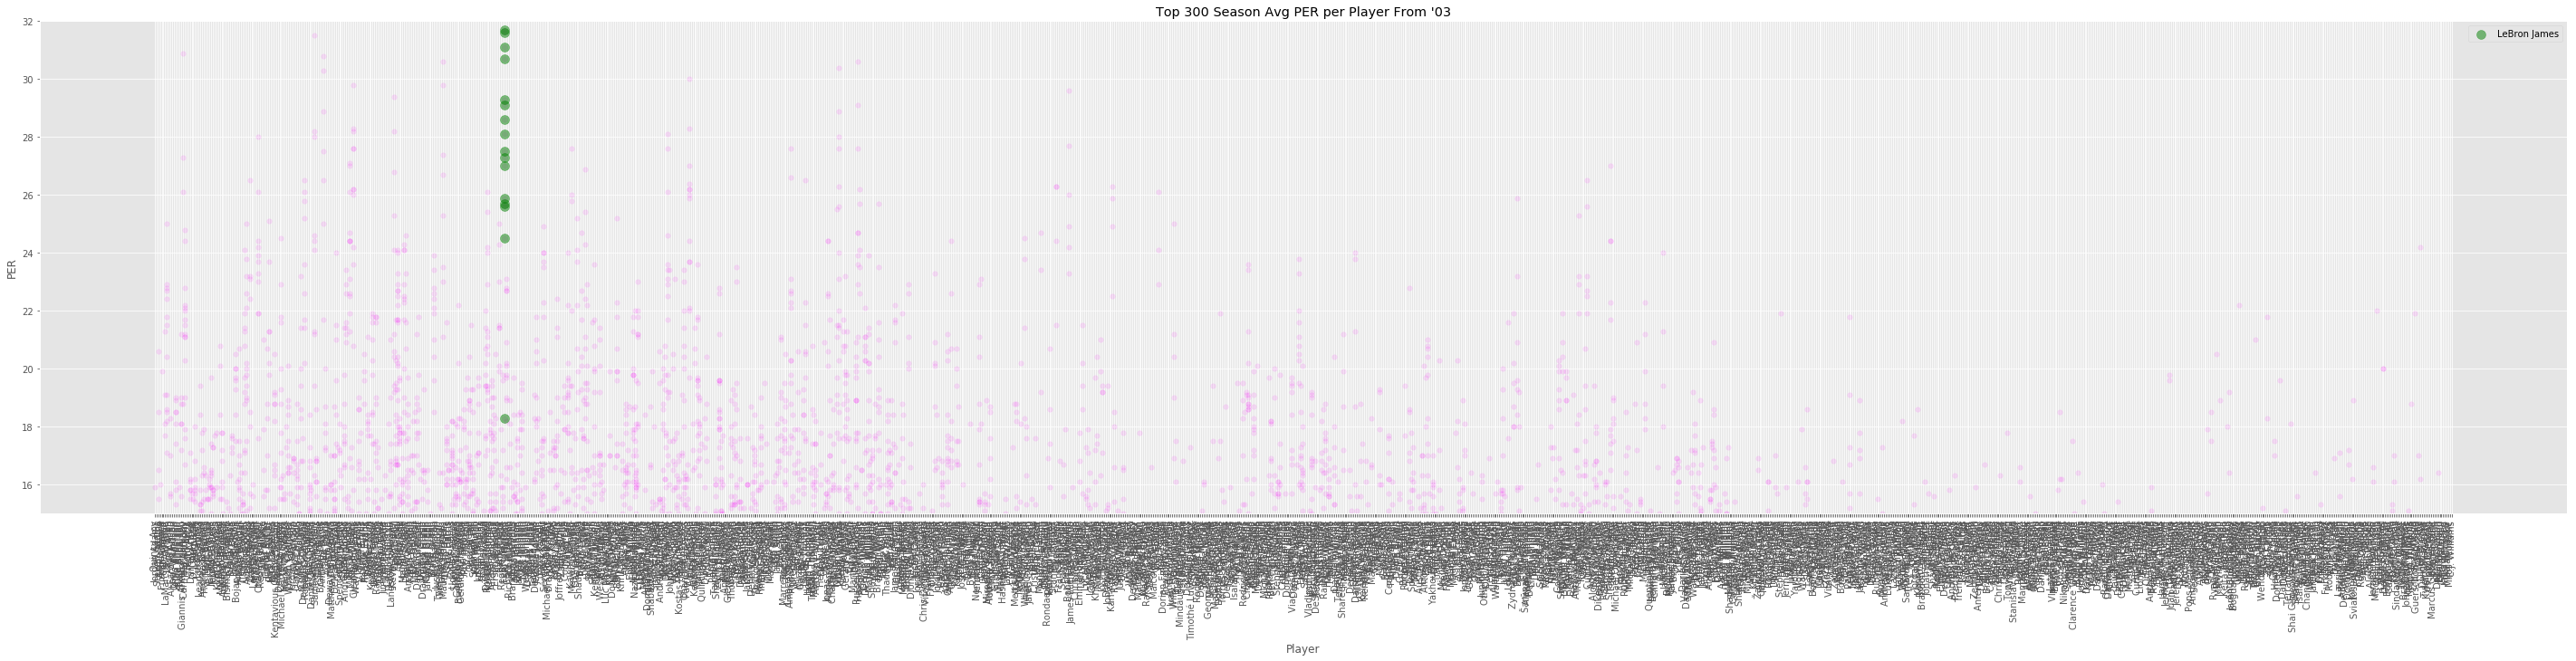

In [458]:
print(adv_df_lbjyrs["PER"].describe())

fig, ax = plt.subplots(figsize=(50,10))
ax.scatter(adv_df_lbjyrs["Player"], adv_df_lbjyrs["PER"], s=30, alpha=0.1, color="magenta", label=None)
ax.scatter(lbj_adv["Player"], lbj_adv["PER"], s=100, alpha=0.5, color="green",
          label="LeBron James")
plt.xticks(rotation="vertical")
ax.set_title("Top 300 Season Avg PER per Player From '03")
ax.set_xlabel("Player")
ax.set_ylabel("PER")
ax.set_ylim(15,32)
ax.legend()
plt.show()

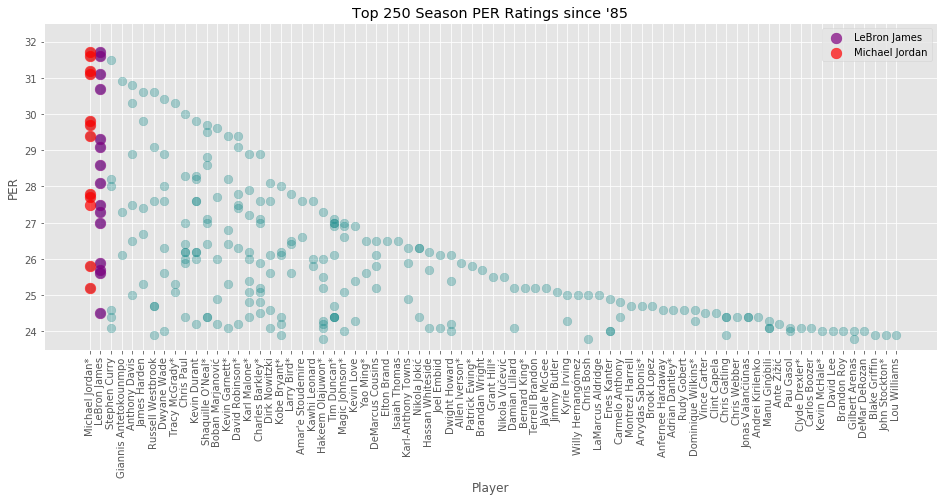

count    250.000000
mean      26.266800
std        2.019398
min       23.800000
25%       24.500000
50%       25.900000
75%       27.500000
max       31.700000
Name: PER, dtype: float64


In [461]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(adv_top["Player"], adv_top["PER"], s=75, alpha=0.3, color="teal", label=None)
ax.scatter(lbj_adv["Player"], lbj_adv["PER"], s=115, alpha=0.7, color="purple",
           label="LeBron James")
ax.scatter(mj_adv["Player"], mj_adv["PER"], s=115, alpha=0.7, color="red",
           label="Michael Jordan")
plt.xticks(rotation="vertical")
ax.set_title("Top 250 Season PER Ratings since '85")
ax.set_xlabel("Player")
ax.set_ylabel("PER")
ax.set_ylim(23.5, 32.5)
ax.legend()
plt.show()

print(adv_top["PER"].describe())